# Part II - Prosper Loan Data Presentation
## by Kaumudi Moholkar

## Investigation Overview


> The main objective of this project is to understand how the company can decrease the default and charged-off loans across various employment groups. The loan amount granted to different income ranges can also be analyzed to get a better understanding of the data. 


## Dataset Overview

> The dataset is the Prosper loan data. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The data has many categorical and numeric values. There is little data that is not adept to the analysis that is required, so necessary changes have been made, to use data to its full potential.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Borrower APR for Chargedoff loans


>There are approximately 12000 charged loans, which is smaller than the rest of the loan status. But there is a multimodal graph, with many small peaks, with one peak of 1500 which is the largest at APR of 0.36. This can clearly states that there are loans allowed although there is a higher APR. These eventually resulted in being charged off. So there was no proper vetting done before loan allotment.

In [5]:
#Charged off loan type data for analysis
loan_df_sub = loan_df[loan_df['LoanStatus'] == 'Chargedoff']

In [6]:
loan_df_sub['BorrowerAPR'].describe()

count    11992.000000
mean         0.257752
std          0.079754
min          0.018230
25%          0.190030
50%          0.262710
75%          0.329580
max          0.462010
Name: BorrowerAPR, dtype: float64

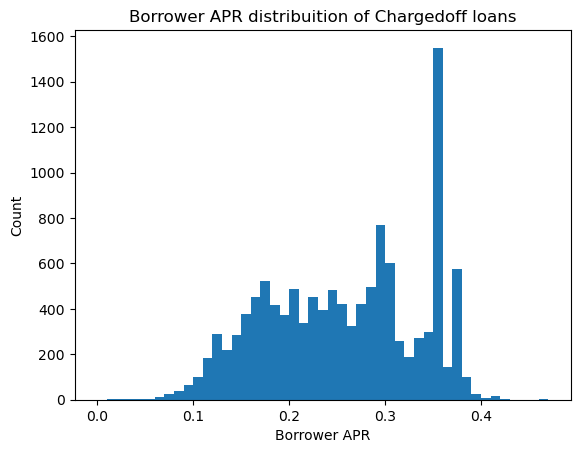

In [7]:
#plotting the Borrower APR for the Charged off loans

bins = np.arange(0, loan_df_sub['BorrowerAPR'].max() + 0.01, 0.01)
plt.hist(data = loan_df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR distribuition of Chargedoff loans');

## Borrower APR of Full-time employed


> There are about 26000 employees in full-time employment. With so many people working full-time, people can be expected to be in the lower APR category. This is true for the most part, but then there is a big shoot-in peak with about 1300 people lying in the category of 0.38 APR. This can mean that the vetting or background check before loan allotment is not being done properly overall. 

In [8]:
#Full-time employed data for analysis
loan_emp = loan_df[loan_df['EmploymentStatus'] == 'Full-time']
loan_emp['BorrowerAPR'].describe()

count    26355.000000
mean         0.204604
std          0.086608
min          0.006530
25%          0.133415
50%          0.187260
75%          0.267620
max          0.413550
Name: BorrowerAPR, dtype: float64

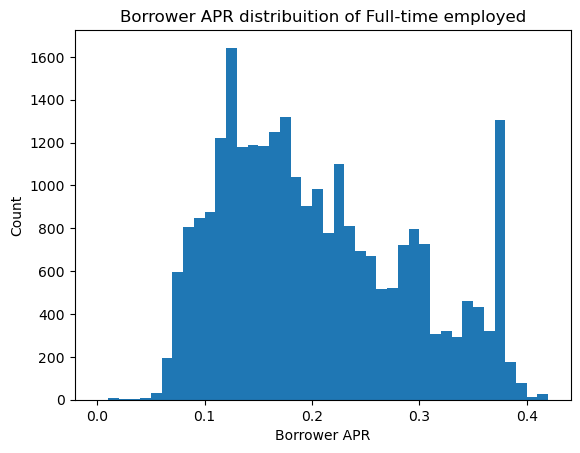

In [9]:
#plotting Borrower APR for full-time employed
bins = np.arange(0,loan_emp['BorrowerAPR'].max()+0.01, 0.01 )
plt.hist(data = loan_emp, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR distribuition of Full-time employed');

##  Loan status and Loan Original Amount of Self employed

> For the category of people who are self-employed, there are a lot of loans approved for them. The loan amount ranges from 1000 to 25,000. This is a really great figure. But there are a lot of people falling into the defaulted loan category. This can be observed from the plot, defaulted has the highest range. This means there is a high-risk category for future loan approval. 


In [10]:
#Changing loan status to categorical
loan_df.loc[loan_df['LoanStatus'].str.contains('Past Due'), 'LoanStatus'] = 'Past Due'
status_classes = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due', 'FinalPaymentInProgress', 'Cancelled']

sclasses = pd.api.types.CategoricalDtype(ordered = True, categories = status_classes)

loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(sclasses)

In [11]:
#Self-employed people for analysis
loan_emp2 = loan_df[loan_df['EmploymentStatus'] == 'Self-employed']

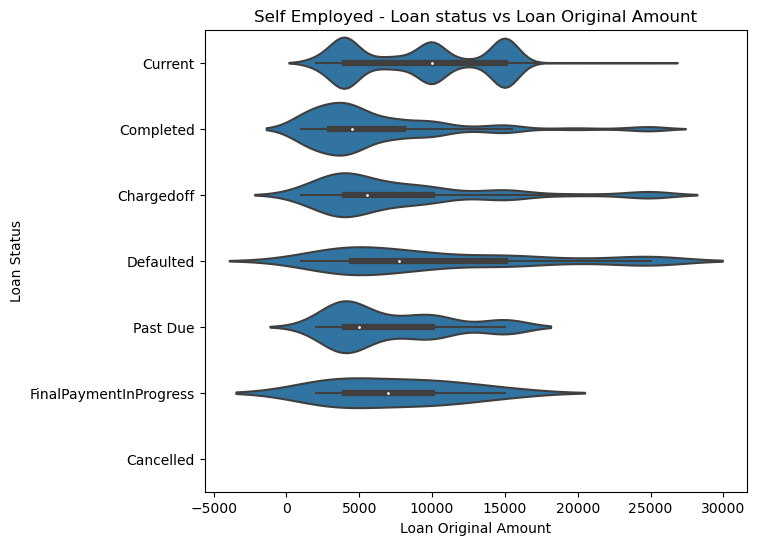

In [12]:
#plotting self employed people loan status and loan amount
default_color = sb.color_palette()[0]
    
plt.figure(figsize= (7,6) )
sb.violinplot(data = loan_emp2, y = 'LoanStatus', x = 'LoanOriginalAmount', color = default_color)
plt.xlabel('Loan Original Amount')
plt.ylabel('Loan Status')
plt.title('Self Employed - Loan status vs Loan Original Amount');

## Loan amount granted to different Income ranges

> There can be observed an increase in the loan amount with respect to an increase in income. There is not any linear increase in the loan amount, but a small amount can be seen with a greater increase at 100,000+ income range people. The income range of 0 dollars cannot be regarded as there is a lot of data where the income range is not displayed or employed. Based on the plot we cannot necessarily state that people with no income displayed lie in the category of 0. 

In [50]:
#Changing the income range to categorical
loan_income = pd.DataFrame(loan_df['IncomeRange'].value_counts().reset_index())
income_classes = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

iclasses = pd.api.types.CategoricalDtype(ordered = True, categories = income_classes)

loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(iclasses)

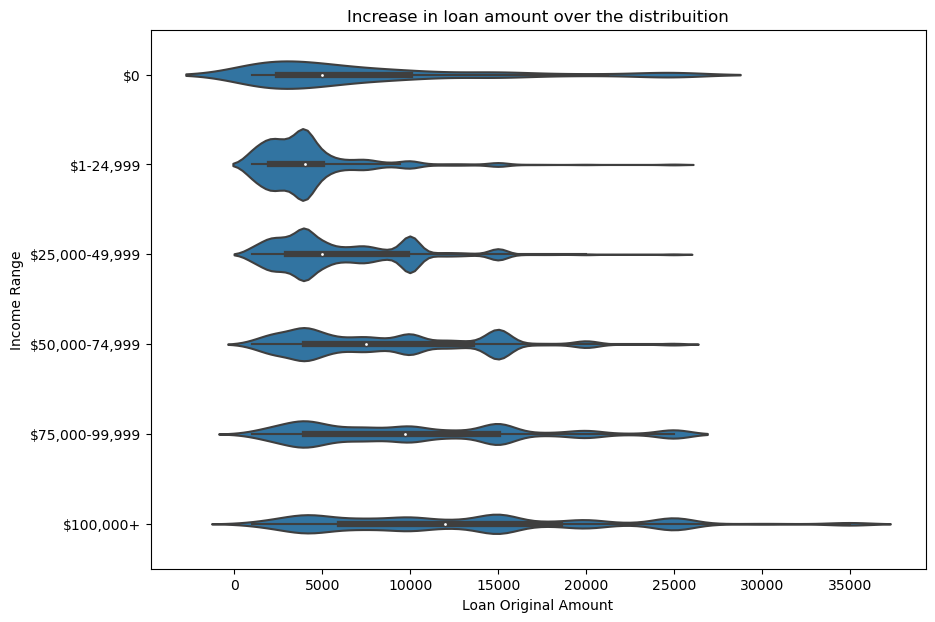

In [52]:
#plotting the loan amout ditribuition with income range

plt.figure(figsize= (10,7))
g = sb.violinplot(data = loan_df, y = 'IncomeRange', x = 'LoanOriginalAmount', color = default_color)
plt.xlabel('Loan Original Amount')
plt.ylabel('Income Range')
plt.title('Increase in loan amount over the distribuition');